In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

In [2]:
from astropy.table import Table
import astropy.units as u
import astropy.constants as c

In [41]:
import sncosmo

In [16]:
lc = Table.read('ZTF20aayhacx_fnu.csv')
lc['mjd'] = lc['jd'] - 2400000.5
lc = lc[lc['mjd'] > 58800]
lc = lc[lc['fnu_microJy'] > lc['fnu_microJy_unc']/2]
lc_g = lc[lc['passband'] == 'ZTF_g']
lc_r = lc[lc['passband'] == 'ZTF_r']

In [23]:
#http://www.astronomy.ohio-state.edu/~martini/usefuldata.html
leff_g = 4830 * u.AA
leff_r = 6260 * u.AA
lc_g['mag'] = (lc_g['fnu_microJy'] * u.Jy * 1e-6).to(u.ABmag,
                                               u.spectral_density(leff_g))
lc_g['mag_unc'] = (lc_g['fnu_microJy'] * u.Jy * 1e-6).to(
    u.ABmag, u.spectral_density(leff_g)) - (
        (lc_g['fnu_microJy'] + lc_g['fnu_microJy_unc']) * u.Jy * 1e-6).to(
            u.ABmag, u.spectral_density(leff_g))
lc_r['mag'] = (lc_r['fnu_microJy'] * u.Jy * 1e-6).to(u.ABmag,
                                               u.spectral_density(leff_r))
lc_r['mag_unc'] = (lc_r['fnu_microJy'] * u.Jy * 1e-6).to(
    u.ABmag, u.spectral_density(leff_r)) - (
        (lc_r['fnu_microJy'] + lc_r['fnu_microJy_unc']) * u.Jy * 1e-6).to(
            u.ABmag, u.spectral_density(leff_r))

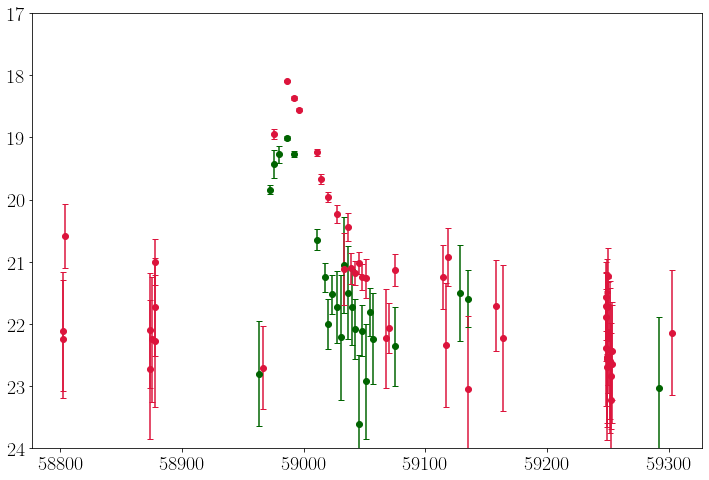

In [28]:
plt.figure(figsize=(12, 8))
plt.errorbar(lc_g['mjd'],
             lc_g['mag'],
             yerr=lc_g['mag_unc'],
             fmt='o',
             capsize=3,
             color='darkgreen')
plt.errorbar(lc_r['mjd'],
             lc_r['mag'],
             yerr=lc_r['mag_unc'],
             fmt='o',
             capsize=3,
             color='crimson')
plt.ylim(17, 24)
plt.gca().invert_yaxis()

In [39]:
out_g = lc_g['mjd', 'mag', 'mag_unc']
with open('SN2020jgb/lc2fit_g.dat', 'w') as f:
    f.writelines('#Date :\n')
    f.writelines('#Mag :\n')
    f.writelines('#Magerr :\n')
    f.writelines('#end :\n')
    f.writelines('@INSTRUMENT SDSS\n')
    f.writelines('@BAND g\n')
    f.writelines('@MAGSYS AB\n')
    for i in out_g:
        f.writelines('{:.4f} {:.3f} {:.3f}\n'.format(i[0], i[1], i[2]))

In [40]:
out_r = lc_r['mjd', 'mag', 'mag_unc']
with open('SN2020jgb/lc2fit_g.dat', 'w') as f:
    f.writelines('#Date :\n')
    f.writelines('#Mag :\n')
    f.writelines('#Magerr :\n')
    f.writelines('#end :\n')
    f.writelines('@INSTRUMENT SDSS\n')
    f.writelines('@BAND r\n')
    f.writelines('@MAGSYS AB\n')
    for i in out_r:
        f.writelines('{:.4f} {:.3f} {:.3f}\n'.format(i[0], i[1], i[2]))

<ErrorbarContainer object of 3 artists>

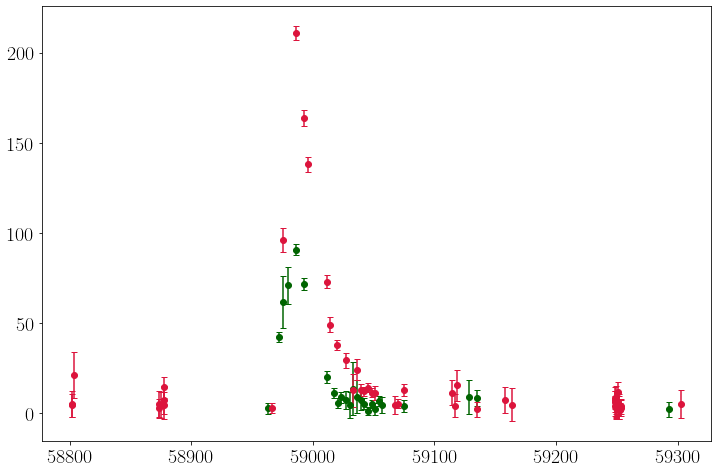

In [22]:
plt.figure(figsize=(12, 8))
plt.errorbar(lc_g['mjd'],
             lc_g['fnu_microJy'],
             yerr=lc_g['fnu_microJy_unc'],
             fmt='o',
             capsize=3,
             color='darkgreen')
plt.errorbar(lc_r['mjd'],
             lc_r['fnu_microJy'],
             yerr=lc_r['fnu_microJy_unc'],
             fmt='o',
             capsize=3,
             color='crimson')